In [ ]:
import numpy as np
import xarray as xr
import seaborn as sns


from src.bootstrap import max_statistic_ci, max_t_ci, max_t_transformed_ci, transform, inverse_transform

In [15]:
np.random.seed(2)
n_boot = 1000

metrics = xr.Dataset({
    "bias": ("bootstrap", np.random.normal(loc=0.1, scale=0.05, size=n_boot)),           # Unbounded
    "crps": ("bootstrap", np.random.gamma(shape=2, scale=0.1, size=n_boot)),         # Positive-only
    "coverage": ("bootstrap", np.random.beta(a=8, b=2, size=n_boot))                     # Bounded [0, 1]
})

metrics["bias"].attrs = {"bounds": (None, None)}
metrics["crps"].attrs = {"bounds": (0, None)}
metrics["coverage"].attrs = {"bounds": (0, 1)}

In [16]:
ci1 = max_statistic_ci(metrics)
ci2 = max_t_ci(metrics)
ci3 = max_t_transformed_ci(metrics)

In [17]:
df = xr.concat([ci1, ci2, ci3], dim=["max stat", "max t", "max t transformed"]).to_dataframe().melt(ignore_index=False).reset_index()

<Axes: xlabel='variable', ylabel='value'>

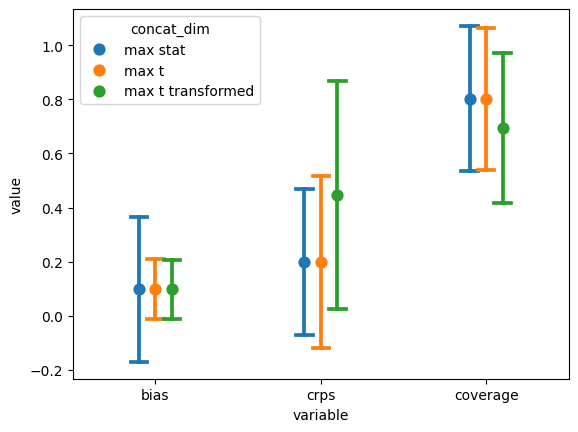

In [18]:
sns.pointplot(data=df, x="variable", y="value", hue="concat_dim", linestyle='none', markers="o", capsize=0.1, dodge=0.2)